# Modelo Predictivo

## 1.- lectura del CSV con los datos preprocesados de la estación de Aotizhongxin

### CARGA DE ARCHIVO A GOOGLE COLAB (ARCHIVO YA SUBIDO SOLO CLICK EN ACTUALIZAR)

In [3]:

from google.colab import files

uploaded = files.upload()

Saving AQI_Estaciones.csv to AQI_Estaciones.csv


# **ACTUALIZAR**

In [4]:
uploaded

{'AQI_Estaciones.csv': b'"fecha","AQI_SO2","AQI_NO2","AQI_PM10","AQI_CO","AQI_O3","ciudad","AQI","Nivel_Aire"\n"2013-10-1",7,36,85,22,21,"Aotizhongxin",85,"Good"\n"2013-10-10",26,27,92,17,21,"Aotizhongxin",92,"Good"\n"2013-10-11",18,37,72,27,43,"Aotizhongxin",72,"Good"\n"2013-10-12",3,41,66,13,37,"Aotizhongxin",66,"Good"\n"2013-10-13",4,32,51,14,25,"Aotizhongxin",51,"Good"\n"2013-10-14",2,24,35,11,17,"Aotizhongxin",35,"Excelent"\n"2013-10-15",3,25,24,8,25,"Aotizhongxin",25,"Excelent"\n"2013-10-16",4,34,64,13,29,"Aotizhongxin",64,"Good"\n"2013-10-17",12,48,108,18,26,"Aotizhongxin",108,"Slightly Polluted"\n"2013-10-18",22,65,150,30,11,"Aotizhongxin",150,"Slightly Polluted"\n"2013-10-19",9,24,56,25,22,"Aotizhongxin",56,"Good"\n"2013-10-2",3,20,28,5,46,"Aotizhongxin",46,"Excelent"\n"2013-10-20",4,27,41,9,25,"Aotizhongxin",41,"Excelent"\n"2013-10-21",11,42,96,11,0,"Aotizhongxin",96,"Good"\n"2013-10-22",19,37,78,11,26,"Aotizhongxin",78,"Good"\n"2013-10-23",4,22,57,8,26,"Aotizhongxin",57,"Goo

### LEEMOS EL ARCHIVO CON PANDAS

In [5]:
import pandas as pd
from datetime import datetime
import io

df = pd.read_csv(io.StringIO(uploaded['AQI_Estaciones.csv'].decode('UTF-8')), sep=',')
## se pensaba colocar 3 columnas pero esto solo aumentaria la dimensionalidad
'''df[['Anio','Mes','Dia']] = df['fecha'].str.split('-', expand=True)'''
## se decidió transformar la fecha al número de dias medidos desde el primero de enero de 1970, en la aplicación transformar lo fecha en valor de numero de dias
df['fecha'] = pd.to_datetime(df['fecha'])
df['dias'] = (df['fecha'] - datetime(1970, 1, 1)).dt.days
## se definió un rango y una categoría a los valores de AQI con la intensión de aumentar la presición, el recall y el f1 score ya que al intentar entrenar cada valor necesita un volumen de datos mayor
rangos = [0, 50, 100, 150, 200, 250, 300, 10000]
categorias = ['Excelente', 'Bueno', 'poco contaminado', 'ligeramente contaminado','moderadamente contaminado','fuertemente contaminado','fuera del rango']
df['Categoria'] = pd.cut(df['AQI'], bins=rangos, labels=categorias)
df.isna().sum()
df2 = df.dropna()
df2.head(50)


,fecha,AQI_SO2,AQI_NO2,AQI_PM10,AQI_CO,AQI_O3,ciudad,AQI,Nivel_Aire,dias,Categoria
0,2013-10-01,7,36,85,22,21.0,Aotizhongxin,85.0,Good,15979,Bueno
1,2013-10-10,26,27,92,17,21.0,Aotizhongxin,92.0,Good,15988,Bueno
2,2013-10-11,18,37,72,27,43.0,Aotizhongxin,72.0,Good,15989,Bueno
3,2013-10-12,3,41,66,13,37.0,Aotizhongxin,66.0,Good,15990,Bueno
4,2013-10-13,4,32,51,14,25.0,Aotizhongxin,51.0,Good,15991,Bueno
5,2013-10-14,2,24,35,11,17.0,Aotizhongxin,35.0,Excelent,15992,Excelente
6,2013-10-15,3,25,24,8,25.0,Aotizhongxin,25.0,Excelent,15993,Excelente
7,2013-10-16,4,34,64,13,29.0,Aotizhongxin,64.0,Good,15994,Bueno
8,2013-10-17,12,48,108,18,26.0,Aotizhongxin,108.0,Slightly Polluted,15995,poco contaminado
9,2013-10-18,22,65,150,30,11.0,Aotizhongxin,150.0,Slightly Polluted,15996,poco contaminado


## 2.- Ajustar los datos al modelo

In [6]:
## debido a que los valores mayores de 300 estan fuera del rango los descartamos para que no se produzca mayor ruido
categoria = 'fuera del rango'
cantidad = df2['Categoria'].value_counts()[categoria]
cantidad
categoria_a_eliminar = 'fuera del rango'
df2 = df2.query('Categoria != @categoria_a_eliminar')
cantidad

73

## 3.- Seleccionar los datos de entrada y de salida para ingresarlos al modelo

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
## dias es la variable para realizar la predicción, como era de esperarse la nueva columna categoría es la variable categórica de salida del modelo
X = df2[['dias', 'AQI_SO2', 'AQI_NO2', 'AQI_PM10','AQI_CO','AQI_O3']]
y = df2['Categoria']
## como SVM admite solamente valores numéricos lo que hacemos es etiquetar cada categoría con un número
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
## se ajustan los datos de entrenamiento y testeo en 70% y 30% respectivamente, elegimos la semilla numero 28 por su mayor valor de rendimiento
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=28)
print("listo")

listo


## 4.- Selección del modelo

In [8]:
from sklearn.svm import SVC

## Seleccioonamos el modelo SVM y ajustamos el kernel a linear debido a que hay mas de 2 dimensiones
model = SVC(C=0.1,kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("listo")

listo


## 5.- Calcular valores de exactitud, presición, esfuerzo y F1

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
## haciendo todo lo posible haciendo un ajuste de datos con la desviación estandar y la media, descartando valores que generan ruido y categorizando se obtuvo los mejores valores hasta el momento

Accuracy: 0.8020524965462799
Precision: 0.8020524965462799
Recall: 0.8020524965462799
F1 Score: 0.8020524965462799


## 6.- Se evalua mediante cross validation

In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.79366489 0.79721729 0.81113085 0.79834172 0.80781759]
Average Accuracy: 0.8016344676917111


## 7.- Se optimiza el aprendizaje del modelo ajustando los hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best parameters', best_params)

Best parameters {'C': 0.1, 'kernel': 'linear'}


## 8.- Se realiza el Test

In [ ]:
from datetime import datetime
def numero_dias(desde_fecha):
    fecha = datetime.strptime(desde_fecha, '%d/%m/%Y')
    fecha_base = datetime(1970, 1, 1)
    diferencia = fecha - fecha_base
    numero_dias = diferencia.days
    return numero_dias
## 2013-10-27 	19 	63 	136 	36 	6 	136 	16005 	poco contaminado
## 2013-10-28 	26 	61 	174 	57 	44 	174 	16006 	ligeramente contaminado

fecha = '28/10/2013'
valor1 = numero_dias(fecha)
valor2 = 26
valor3 = 61
valor4 = 174
valor5 = 57
valor6 = 44

dato_prediccion = [[valor1, valor2, valor3, valor4, valor5, valor6]]
prediccion = best_model.predict(dato_prediccion)


print("La categoría predicha para la fecha", fecha, "es:", prediccion)

La categoría predicha para la fecha 28/10/2013 es: [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


GRAFICAS DEL SVC

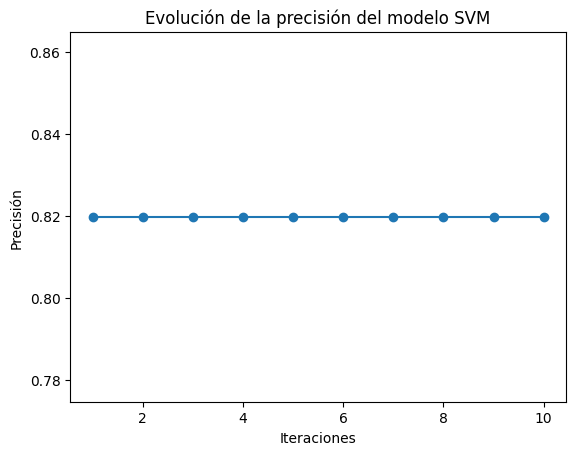

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

num_iteraciones = 10  # Número de iteraciones del entrenamiento
lista_metricas = []
for i in range(num_iteraciones):
    # Entrenar el modelo

    model.fit(X_train, y_train)

    # Calcular la métrica de interés (precisión en este caso)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Almacenar la métrica en la lista
    lista_metricas.append(accuracy)

iteraciones = range(1, num_iteraciones + 1)

plt.plot(iteraciones, lista_metricas, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión del modelo SVM')
plt.show()

## ENTORNO DINÁMICO

In [ ]:
!pip install tkcalendar
import tkinter as tk
from tkcalendar import Calendar
from datetime import datetime
import numpy as np

def numero_dias(desde_fecha):
    fecha = datetime.strptime(desde_fecha, '%m/%d/%y')
    fecha_base = datetime(1970, 1, 1)
    diferencia = fecha - fecha_base
    numero_dias = diferencia.days
    return numero_dias

def limpiar_textbox(event):
    textbox1.config(bg="white")
    textbox2.config(bg="white")
    textbox3.config(bg="white")
    textbox4.config(bg="white")
    textbox5.config(bg="white")


def predecir():
    # Obtener los datos de entrada de las interfaces

    try:
        valor1 = calendario.get_date()

    except Exception as e:
        print("Error al obtener el texto:", str(e))
    try:
        valor2 = int(textbox1.get())

    except Exception as e:
        textbox1.config(bg="red")
        print("Error al obtener el texto:", str(e))
    try:
        valor3 = int(textbox2.get())

    except Exception as e:
        textbox2.config(bg="red")
        print("Error al obtener el texto:", str(e))
    try:
        valor4 = int(textbox3.get())

    except Exception as e:
        textbox3.config(bg="red")
        print("Error al obtener el texto:", str(e))
    try:
        valor5 = int(textbox4.get())

    except Exception as e:
        textbox4.config(bg="red")
        print("Error al obtener el texto:", str(e))
    try:
         valor6 = int(textbox5.get())

    except Exception as e:
        textbox5.config(bg="red")
        print("Error al obtener el texto:", str(e))


    dato_prediccion = [[numero_dias(valor1), valor2, valor3, valor4, valor5, valor6]]
    prediccion = best_model.predict(dato_prediccion)

    # Definir el diccionario de mapeo
    mapeo = {0: "excelente", 1: "bueno", 2: "poco contaminado", 3: "ligeramente contaminado", 4: "moderadamente contaminado", 5: "fuertemente contaminado"}

    funcion_vectorizada = np.vectorize(lambda numero: mapeo[numero])

    # Reemplazar los números por los strings correspondientes
    resultado_texto = funcion_vectorizada(prediccion)


    label_resultado.config(text=resultado_texto)

ventana = tk.Tk()

calendario = Calendar(ventana)

##'dias', 'AQI_SO2', 'AQI_NO2', 'AQI_PM10','AQI_CO','AQI_O3'
label_gas1 = tk.Label(ventana, text="ICA SO2")
textbox1 = tk.Entry(ventana)
label_gas2 = tk.Label(ventana, text="ICA NO2")
textbox2 = tk.Entry(ventana)
label_gas3 = tk.Label(ventana, text="ICA PM10")
textbox3 = tk.Entry(ventana)
label_gas4 = tk.Label(ventana, text="ICA CO")
textbox4 = tk.Entry(ventana)
label_gas5 = tk.Label(ventana, text="ICA O3")
textbox5 = tk.Entry(ventana)

boton_prediccion = tk.Button(ventana, text="Realizar predicción", command=predecir)

label_resultado = tk.Label(ventana, text="CALIDAD DE AIRE")

calendario.pack()
label_gas1.pack()
textbox1.pack()
label_gas2.pack()
textbox1.bind("<Key>", limpiar_textbox)
textbox2.pack()
label_gas3.pack()
textbox2.bind("<Key>", limpiar_textbox)
textbox3.pack()
label_gas4.pack()
textbox3.bind("<Key>", limpiar_textbox)
textbox4.pack()
label_gas5.pack()
textbox4.bind("<Key>", limpiar_textbox)
textbox5.pack()
boton_prediccion.pack()
textbox5.bind("<Key>", limpiar_textbox)
label_resultado.pack()


ventana.mainloop()



## se intentó pero no se puede un entorno GUI debido a que colab no es compatible y ningun otro cuaderno online, debido a que estan diseñados solo para ser dinámicos mediante celdas de código o Markdown
## si se desea hacer algo dinámico debe ser sobre cuaderno jupyter locales

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.7 MB/s eta 0:00:00


TclError: ignored